In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv('/content/zomato.csv', encoding='latin-1')


In [68]:
pd.set_option('display.max_columns', None)
train_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
train_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
train_df.shape

(9551, 21)

In [8]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
train_df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
802,121120,Virgin Courtyard,1,Chandigarh,"Backside, SCO 1A, Madhya Marg, Sector 7, Chand...",Sector 7,"Sector 7, Chandigarh",76.797620,30.733480,Italian,...,Indian Rupees(Rs.),No,No,No,No,4,4.4,Green,Very Good,817
3048,9747,Life Caffe,1,New Delhi,"B-49, The Corus, Inner Circle, Connaught Place...",Connaught Place,"Connaught Place, New Delhi",77.218291,28.634177,"Cafe, North Indian, Italian, Japanese, Fast Food",...,Indian Rupees(Rs.),Yes,No,No,No,3,3.6,Yellow,Good,391
4649,844,Khan Chacha,1,New Delhi,"Shop 50, 1st Floor, Middle Lane, Khan Market, ...",Khan Market,"Khan Market, New Delhi",77.227313,28.600745,"Mughlai, North Indian",...,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,2860
7844,312364,Shree Nandhini Cafe,1,New Delhi,"3/1, Double Storey, Opposite Hanuman Mandir, V...",Vijay Nagar,"Vijay Nagar, New Delhi",77.201617,28.689801,"South Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,1,3.3,Orange,Average,27
9293,18408381,Fish Streat,94,Jakarta,"Jl. Tebet Timur Dalam Raya 44B, Tebet, Jakarta",Tebet,"Tebet, Jakarta",106.856413,-6.232816,"Seafood, Western",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.0,Green,Very Good,331


In [10]:
train_df.describe()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [18]:
train_df[train_df['Votes'] == train_df['Votes'].max()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
728,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",2000,Indian Rupees(Rs.),No,No,No,No,4,4.8,Dark Green,Excellent,10934


In [19]:
train_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

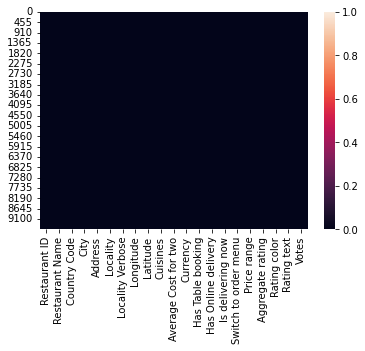

In [23]:
# sns.heatmap(train_df.isnull(), cmap())

In [28]:
country_df = pd.read_excel('/content/Country-Code.xlsx')

In [30]:
country_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [31]:
final_df=pd.merge(train_df, country_df, on='Country Code', how='left')

In [35]:
country_values=final_df['Country'].value_counts().values

In [36]:
country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

In [37]:
country_names=final_df['Country'].value_counts().index

([<matplotlib.patches.Wedge at 0x7f90f4e6bcd0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

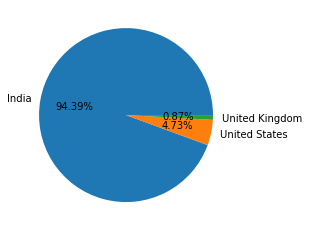

In [41]:
# plotting top 3 countries
plt.pie(country_values[:3], labels=country_names[:3], autopct='%1.2f%%')

In [57]:
final_df.groupby(['Country', 'Aggregate rating']).size()

Country        Aggregate rating
Australia      2.4                  1
               2.6                  1
               2.9                  1
               3.2                  1
               3.4                  1
                                   ..
United States  4.5                 24
               4.6                 18
               4.7                  9
               4.8                  3
               4.9                 14
Length: 222, dtype: int64

In [56]:
final_df[final_df['Aggregate rating'] == 0]['Country'].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [58]:
final_df.groupby(['Country', 'Currency']).size()

Country         Currency              
Australia       Dollar($)                   24
Brazil          Brazilian Real(R$)          60
Canada          Dollar($)                    4
India           Indian Rupees(Rs.)        8652
Indonesia       Indonesian Rupiah(IDR)      21
New Zealand     NewZealand($)               40
Phillipines     Botswana Pula(P)            22
Qatar           Qatari Rial(QR)             20
Singapore       Dollar($)                   20
South Africa    Rand(R)                     60
Sri Lanka       Sri Lankan Rupee(LKR)       20
Turkey          Turkish Lira(TL)            34
UAE             Emirati Diram(AED)          60
United Kingdom  Pounds(£)                  80
United States   Dollar($)                  434
dtype: int64

In [64]:
final_df[final_df['Has Online delivery'] == 'Yes']['Country'].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

Univariate Analysis
Observations
 
1 - Dataset contains most of the data from indian cities 
    New Delhi, Gurgaon, Noida

2 -     

In [72]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [73]:
final_df.shape

(9551, 22)

In [77]:
final_df['City'].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

([<matplotlib.patches.Wedge at 0x7f90f1117b90>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

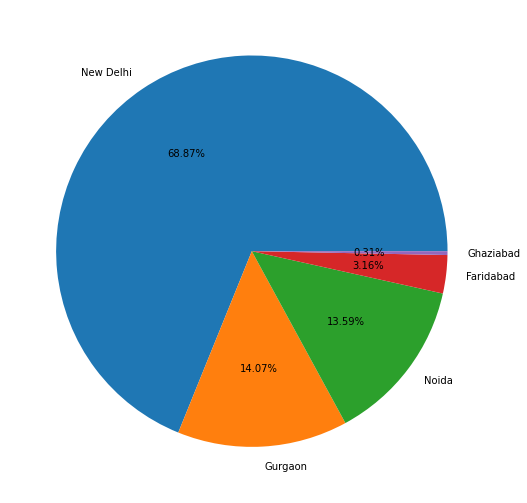

In [89]:
plt.rcParams["figure.figsize"] = (12,9)

plt.pie(final_df['City'].value_counts()[:5].values, labels=final_df['City'].value_counts().index[:5], autopct='%1.2f%%')

In [98]:
final_df['Has Online delivery'].reset_index().head(25)

,index,Has Online delivery
0,0,No
1,1,No
2,2,No
3,3,No
4,4,No
5,5,No
6,6,No
7,7,No
8,8,No
9,9,No


In [97]:
final_df['Average Cost for two'].reset_index().sample(15)

,index,Average Cost for two
7715,7715,1000
2840,2840,100
3864,3864,450
2450,2450,1100
3472,3472,300
5749,5749,250
2310,2310,1200
1815,1815,200
2728,2728,1000
5686,5686,250
